# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.179400e+01     1.400536e+01
 * time: 0.004045009613037109
     1     6.350597e+01     1.070056e+01
 * time: 0.011317014694213867
     2     5.417779e+01     1.475328e+01
 * time: 0.0276339054107666
     3     4.045444e+01     1.045537e+01
 * time: 0.05001401901245117
     4     2.962938e+01     9.649648e+00
 * time: 0.15468406677246094
     5     2.697351e+01     7.715850e+00
 * time: 0.17478108406066895
     6     1.228719e+01     3.099983e+00
 * time: 0.1941070556640625
     7     1.169967e+01     4.371416e+00
 * time: 0.20720601081848145
     8     1.047031e+01     4.346265e+00
 * time: 0.2235410213470459
     9     9.469241e+00     4.453727e+00
 * time: 0.2397780418395996
    10     8.125801e+00     2.157649e+00
 * time: 0.2558140754699707
    11     7.799122e+00     4.221419e+00
 * time: 0.26872706413269043
    12     7.504871e+00     3.684515e+00
 * time: 0.3262920379638672
    13     7.133356e+00     2.519242e+00
 * time: 0.3

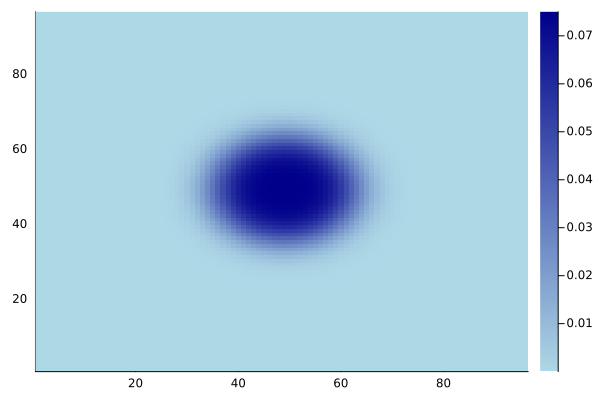

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)